In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain = [0, 1]

x0 = [0.1, 0.5, 0.6]
a0 = [1.5, 0.8, -1.0]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([0.1, 0.5, 0.6], [1.5, 0.8, -1.0], 1, 3)

In [4]:
# Define noise level
noise_level = 0.02

# Seed for noise
# Random.seed!(22)

0.02

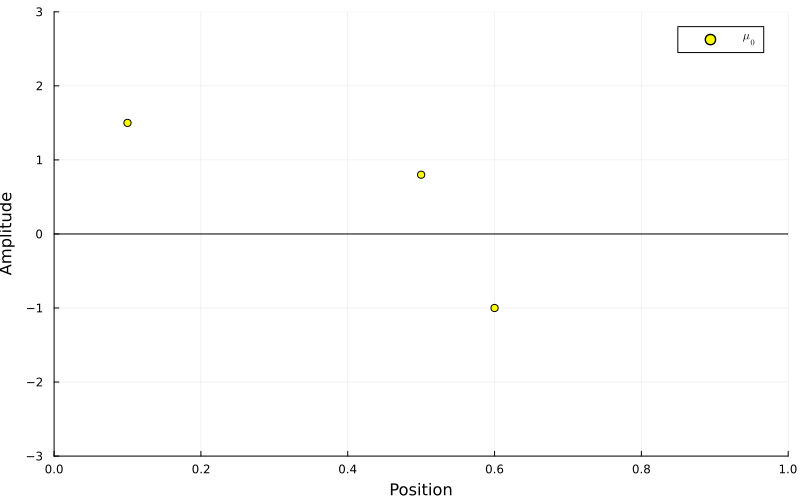

In [5]:
# Define the plot
num_points = 1000
plt_grid = range(domain..., length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = plot(xlims=extrema(domain), ylims=(-3, 3), xlabel="Position", ylabel="Amplitude", legend=:topright, size=plot_size)
hline!(plt, [0], linestyle=:solid, color=:black, label="")

plot_spikes!(plt, μ0, label=L"μ_0", color=:yellow)

In [6]:
ops = gaussian_operators_1D(.05, plt_grid)

Operators(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.001:1.0, var"#gauss1DN#28"{var"#gauss1D#27"}(var"#gauss1D#27"())), var"#Φ#31"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}}(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.001:1.0, var"#gauss1DN#28"{var"#gauss1D#27"}(var"#gauss1D#27"()))), var"#adjΦ#32"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#adjΦ#26#33"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}}}(0.0:0.001:1.0, var"#adjΦ#26#33"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base

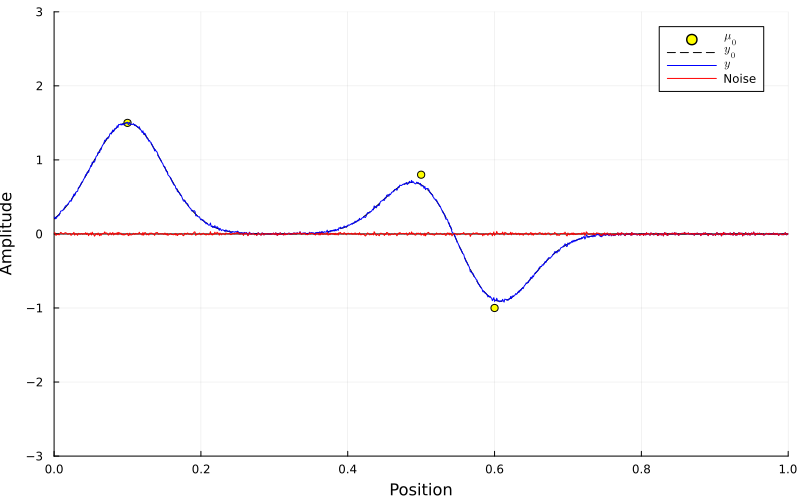

In [7]:
# Calculate the observation y0 = Φμ0
y0 = ops.Φ(x0, a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

plot!(plt_obs, plt_grid, y0, label=L"y_0", color=:black, linestyle=:dash)
plot!(plt_obs, plt_grid, y, label=L"y", color=:blue)
plot!(plt_obs, plt_grid, w, label="Noise", color=:red)


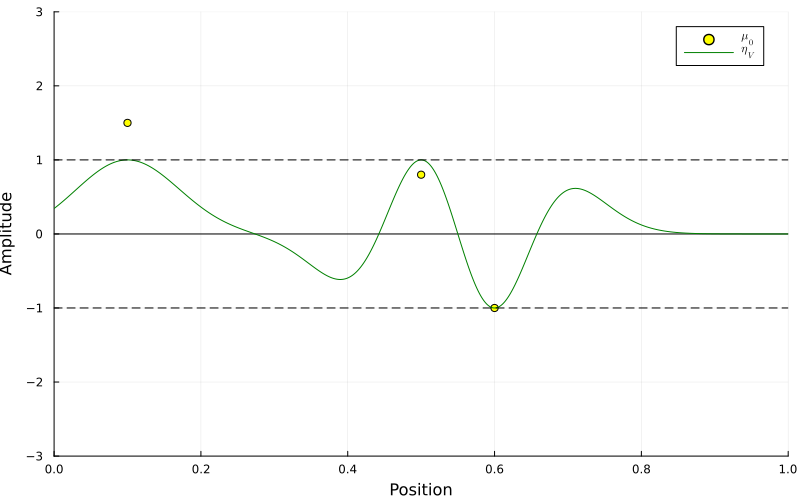

In [8]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

plot!(plt_cert, plt_grid, ηV, label=L"η_V", color=:green)
hline!(plt_cert, [1, -1], linestyle=:dash, color=:black, label="")

## Sliding Frank-Wolfe

In [ ]:
# Define λ the regularisation parameter
λ = 1

prob_sfw = BLASSO(y, ops, domain, λ)

solve!(prob_sfw, :SFW)

  2.436630 seconds (1.46 M allocations: 3.936 GiB, 24.47% gc time)


BLASSO{Float64}([0.21799072579771825, 0.22916127049094137, 0.20453155182842386, 0.21140285658083924, 0.23065691160440013, 0.24291017834600812, 0.24668067876818173, 0.2536873940698862, 0.28198955067853815, 0.3075383690888439  …  -0.009041777148736756, -0.011145335083090345, -0.0005794731256409891, -0.011574559596046974, 0.00034177250417510613, 0.017635702569514477, -0.0011378476803695172, -0.012457173721300003, 0.004849609367236888, -0.000433268225091331], Operators(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.001:1.0, var"#gauss1DN#28"{var"#gauss1D#27"}(var"#gauss1D#27"())), var"#Φ#31"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}}(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}

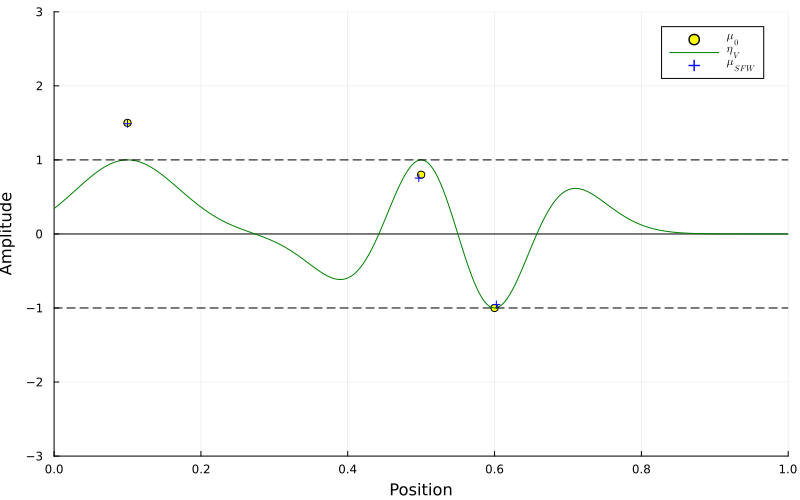

In [16]:
plt_sfw = deepcopy(plt_cert)

plot_spikes!(plt_sfw, prob_sfw.μ, label=L"μ_{SFW}", color=:blue, marker=:cross)